In [1]:
# ================================
# Data Cleaning and Preprocessing
# ================================

# Filled missing values in 'director', 'cast', 'country', 'rating', and 'duration' with 'Unknown'
# Converted 'date_added' to datetime format and extracted 'year_added' and 'month_added'
# Removed rows with missing 'date_added' entries
# Extracted numeric duration and duration type from 'duration' column (e.g., "90 min", "2 seasons")
# Normalized duration type values (e.g., converted 'seasons' to 'season', 'mins' to 'min')
# Converted TV show durations from seasons to approximate minutes (1 season ≈ 450 mins)
# Stripped whitespace from string columns (e.g., 'title', 'director', 'cast', 'country', etc.)
# Removed duplicate rows

# =================================
# Feature Engineering
# =================================

# Created 'duration_num' for numeric duration values
# Created 'duration_type' for type of duration (e.g., min, season)
# Created 'standard_duration_mins' to standardize movie and TV show durations in minutes
# Extracted 'year_added' and 'month_added' from 'date_added' for temporal analysis
# Extracted most frequent actors using the 'cast' column
# Dropped rows where 'country' is 'Unknown' or missing
# Prepared data for visualization and grouped data for analysis (e.g., by year, type, country)

# ================================
# Data Export
# ================================

# Saved cleaned dataset to 'netflix_cleaned.csv'
!pip install tabulate



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate



# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv("C:/Users/mhesh/Downloads/archive/netflix_titles.csv")
print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+-----------+---------+----------------------------------+-------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------+--------------------+----------------+----------+------------+---------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | show_id   | type    | title                            | director                      | cast                                                                                                                                                

In [142]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [143]:
# Some columns have missing values  director, cast, country.

print(df.isnull().sum())


df['director'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [145]:
df['date_added'] = pd.to_datetime(df['date_added'])


df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print(tabulate(df.head(10), headers='keys', tablefmt='psql'))


+----+-----------+---------+----------------------------------+-------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------+---------------------+----------------+----------+------------+---------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+---------------+
|    | show_id   | type    | title                            | director                      | cast                                                                                                                

In [146]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


,release_year,year_added,month_added
count,8807.000000,8797.000000,8797.000000
mean,2014.180198,2018.871888,6.654996
std,8.819312,1.574243,3.436554
min,1925.000000,2008.000000,1.000000
25%,2013.000000,2018.000000,4.000000
50%,2017.000000,2019.000000,7.000000
75%,2019.000000,2020.000000,10.000000
max,2021.000000,2021.000000,12.000000


In [147]:
df[df['date_added'].isnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


In [148]:
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)').astype(str)
df['duration_type'] = df['duration_type'].str.lower().str.strip()
df['duration_type'] = df['duration_type'].replace({'seasons': 'season', 'mins': 'min'})

print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+-----------+---------+----------------------------------+-------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------+---------------------+----------------+----------+------------+---------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+---------------+----------------+-----------------+
|    | show_id   | type    | title                            | director                      | cast                                                                             

In [149]:
tv_shows = df[df['duration_type'] == 'season']
movies = df[df['duration_type'] == 'min']


In [150]:

df['standard_duration_mins'] = df.apply(
    lambda row: row['duration_num'] * 450 if row['duration_type'] == 'season' else row['duration_num'],
    axis=1
)
print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+-----------+---------+----------------------------------+-------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------+---------------------+----------------+----------+------------+---------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+---------------+----------------+-----------------+--------------------------+
|    | show_id   | type    | title                            | director                      | cast                                                  

In [151]:
df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()
df['country'] = df['country'].str.strip()
df['rating'] = df['rating'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
df['description'] = df['description'].str.strip()


In [152]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   show_id                 8807 non-null   object        
 1   type                    8807 non-null   object        
 2   title                   8807 non-null   object        
 3   director                8807 non-null   object        
 4   cast                    8807 non-null   object        
 5   country                 8807 non-null   object        
 6   date_added              8797 non-null   datetime64[ns]
 7   release_year            8807 non-null   int64         
 8   rating                  8807 non-null   object        
 9   duration                8807 non-null   object        
 10  listed_in               8807 non-null   object        
 11  description             8807 non-null   object        
 12  year_added              8797 non-null   float64 

In [153]:
mode_value = df['standard_duration_mins'].mode()[0]
df['standard_duration_mins'].fillna(mode_value, inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   show_id                 8807 non-null   object        
 1   type                    8807 non-null   object        
 2   title                   8807 non-null   object        
 3   director                8807 non-null   object        
 4   cast                    8807 non-null   object        
 5   country                 8807 non-null   object        
 6   date_added              8797 non-null   datetime64[ns]
 7   release_year            8807 non-null   int64         
 8   rating                  8807 non-null   object        
 9   duration                8807 non-null   object        
 10  listed_in               8807 non-null   object        
 11  description             8807 non-null   object        
 12  year_added              8797 non-null   float64 

,release_year,year_added,month_added,duration_num,standard_duration_mins
count,8807.000000,8797.000000,8797.000000,8804.000000,8807.000000
mean,2014.180198,2018.871888,6.654996,69.846888,310.765187
std,8.819312,1.574243,3.436554,50.814828,506.681527
min,1925.000000,2008.000000,1.000000,1.000000,3.000000
25%,2013.000000,2018.000000,4.000000,2.000000,92.000000
50%,2017.000000,2019.000000,7.000000,88.000000,112.000000
75%,2019.000000,2020.000000,10.000000,106.000000,450.000000
max,2021.000000,2021.000000,12.000000,312.000000,7650.000000


In [ ]:

print(df['type'].value_counts())
print(df['country'].value_counts().head(10))
print(df['rating'].value_counts())


Movie      6131
TV Show    2676
Name: type, dtype: int64
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


In [155]:

from collections import Counter
cast_list = df['cast'].dropna().str.split(', ')
flat_cast = [actor.strip() for sublist in cast_list for actor in sublist]
top_actors = Counter(flat_cast).most_common(10)
print(top_actors)


[('Unknown', 825), ('Anupam Kher', 43), ('Shah Rukh Khan', 35), ('Julie Tejwani', 33), ('Naseeruddin Shah', 32), ('Takahiro Sakurai', 32), ('Rupa Bhimani', 31), ('Akshay Kumar', 30), ('Om Puri', 30), ('Yuki Kaji', 29)]


In [156]:
df.to_csv('netflix_cleaned.csv', index=False)


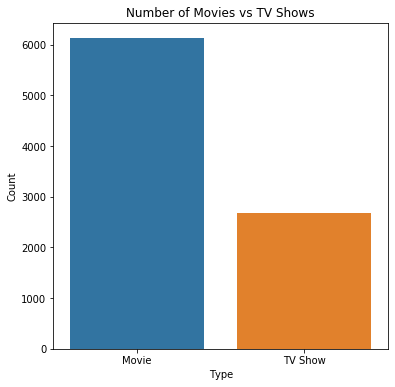

In [157]:
import seaborn as sns


plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='type')
plt.title('Number of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


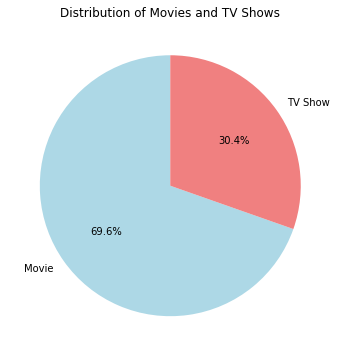

In [158]:


plt.figure(figsize=(6, 6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Movies and TV Shows')
plt.show()



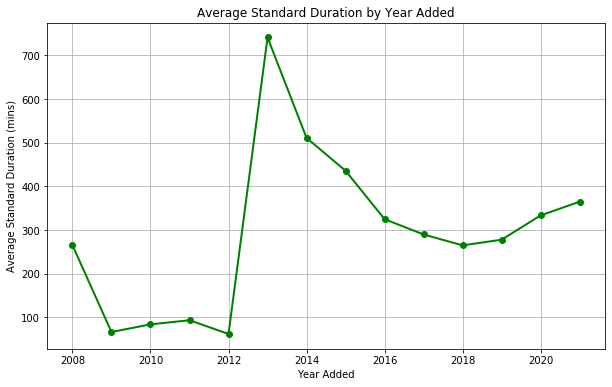

In [159]:
plt.figure(figsize=(10, 6))
year_added_duration = df.groupby('year_added')['standard_duration_mins'].mean()
plt.plot(year_added_duration.index, year_added_duration.values, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Average Standard Duration by Year Added')
plt.xlabel('Year Added')
plt.ylabel('Average Standard Duration (mins)')
plt.grid(True)
plt.show()


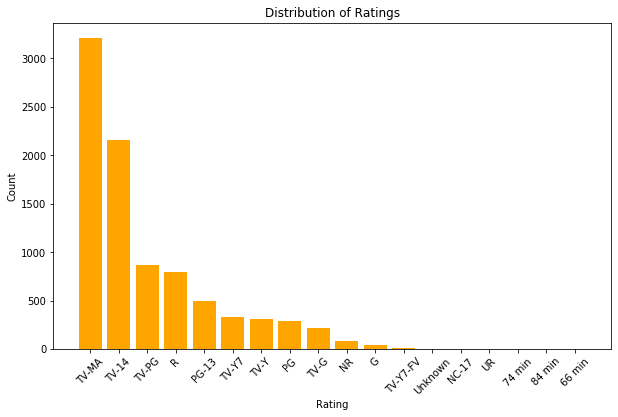

In [160]:
plt.figure(figsize=(10, 6))
rating_counts = df['rating'].value_counts()
plt.bar(rating_counts.index, rating_counts.values, color='orange')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<Figure size 720x432 with 0 Axes>

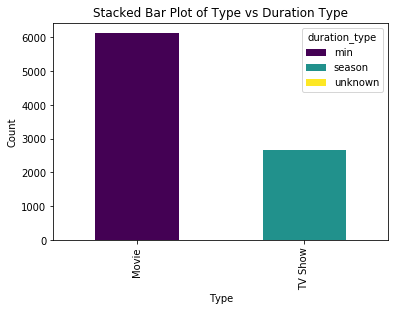

In [161]:
plt.figure(figsize=(10, 6))
duration_type_counts = df.groupby(['type', 'duration_type']).size().unstack()
duration_type_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Stacked Bar Plot of Type vs Duration Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


<Figure size 864x432 with 0 Axes>

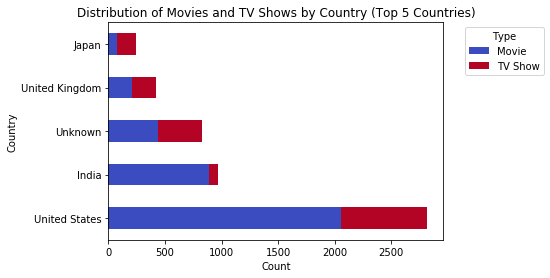

In [162]:
df = df[~df['country'].isin(['Unknown'])]  
df = df.dropna(subset=['country']) 
# Get the top 5 countries based on the total count
top_5_countries = country_type_counts.sum(axis=1).sort_values(ascending=False).head(5)

# Select data for the top 5 countries
top_5_country_type_counts = country_type_counts.loc[top_5_countries.index]

plt.figure(figsize=(12, 6))
top_5_country_type_counts.plot(kind='barh', stacked=True, colormap='coolwarm')
plt.title('Distribution of Movies and TV Shows by Country (Top 5 Countries)')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()







In [163]:
df['country'].describe(include='all')


count              7976
unique              748
top       United States
freq               2818
Name: country, dtype: object

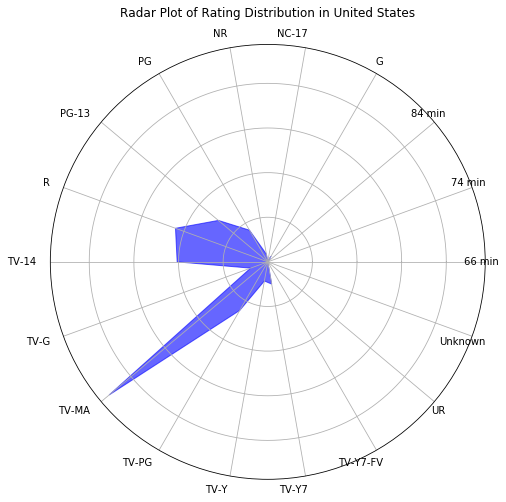

In [164]:
import numpy as np

# Group by country and rating, count occurrences
rating_distribution = df.groupby(['country', 'rating']).size().unstack().fillna(0)

# Select a country to plot
country_data = rating_distribution.loc['United States']

# Create radar plot
labels = country_data.index
values = country_data.values

# Number of variables
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot close to a circle
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='blue', alpha=0.6)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.title('Radar Plot of Rating Distribution in United States')
plt.show()


In [165]:
# Drop rows where director is 'Unknown' or NaN
df = df[~df['director'].isin(['Unknown'])]  # Removes rows with 'Unknown'
df = df.dropna(subset=['director'])         # Removes rows with NaN in 'director'


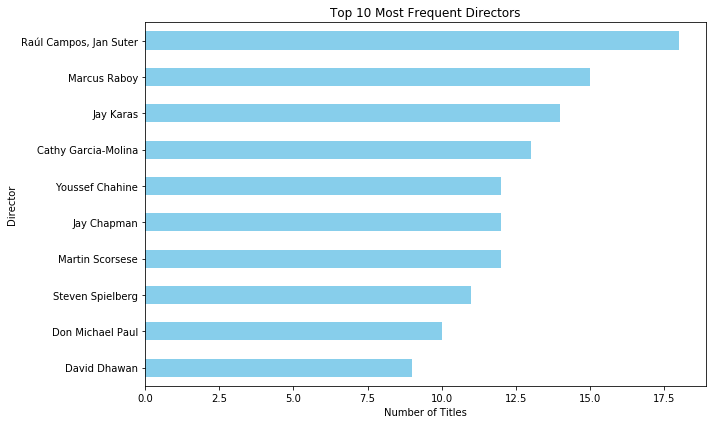

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Most frequent at the top
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


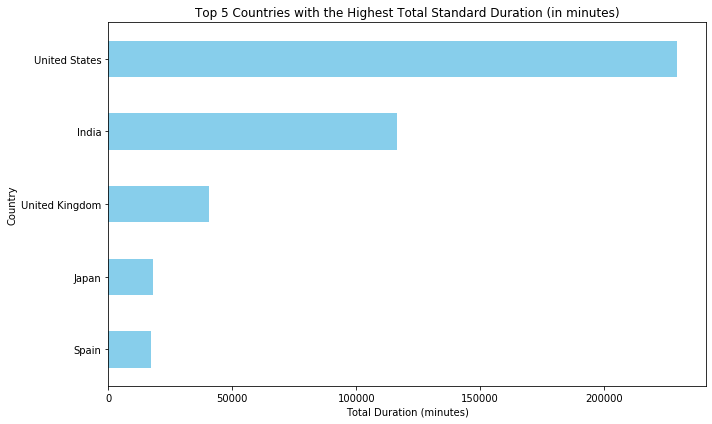

In [170]:
import matplotlib.pyplot as plt

# Group by country and calculate the total 'standard_duration_mins'
country_total_duration = df.groupby('country')['standard_duration_mins'].sum().sort_values(ascending=False)

# Select top 5 countries based on total duration
top_5_countries = country_total_duration.head(5)

# Plotting the top 5 countries with the highest total standard duration
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Most frequent at the top
plt.title('Top 5 Countries with the Highest Total Standard Duration (in minutes)')
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

